In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [27]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

In [29]:
train_images.shape

(60000, 28, 28)

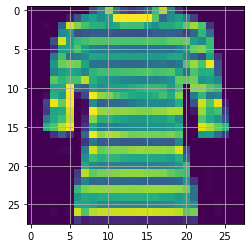

In [30]:
plt.figure()
plt.imshow(train_images[26])
plt.grid()

In [31]:
train_images, test_images

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [32]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images, test_images

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [33]:
%matplotlib inline 


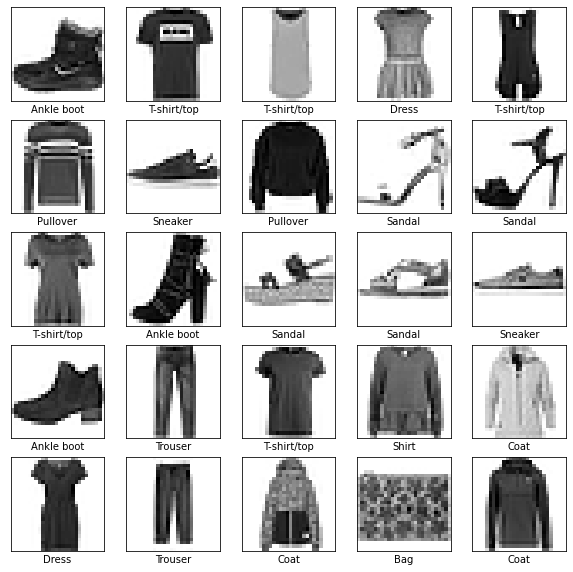

In [34]:
plt.figure(figsize= (10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap= plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [47]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), 
                          keras.layers.Dense(128, activation=tf.nn.relu), 
                          keras.layers.Dense(10, activation=tf.nn.softmax)])

In [48]:
model.compile(optimizer=tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [49]:
model.fit(train_images, train_labels, epochs= 5 )  #epochs es el numero de iteraciones 

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4999 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3747 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3327 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3098 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2913 - accuracy: 0.8923


In [50]:
test_loss , test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy = {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8760
Accuracy = 0.8759999871253967


In [51]:
predictions = model.predict(test_images)

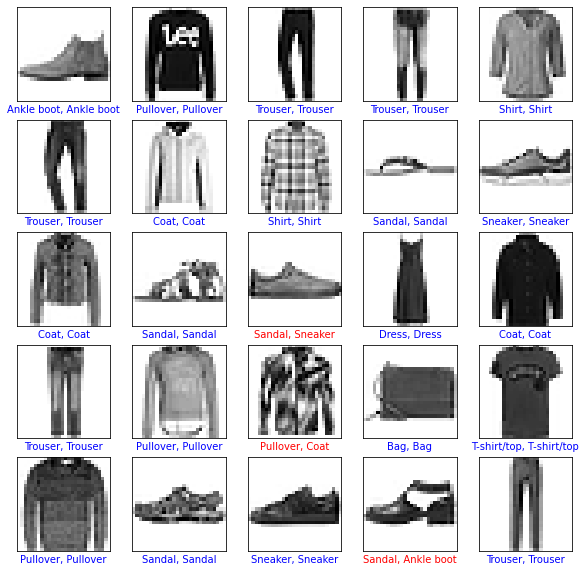

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5 , i + 1 )
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel(f'{class_names[predicted_label]}, {class_names[true_label]}', color = color)